In [118]:
import phoebe 
from phoebe import u, c

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time

In [119]:
b = phoebe.default_binary()

# Dataset

In [120]:
data_lc = []

with open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/dbf3.txt', 'r') as file:
    lines = file.readlines()[14:] 

    for line in lines:
        parts = line.split()

        if 'J0822' in parts[1]:
            numeric_data = [float(parts[2]), float(parts[3]), float(parts[4])]
            data_lc.append(numeric_data)

j0822_lc = np.array(data_lc)

In [143]:
lc_times = j0822_lc[:, 0]

# By taking reference flux as 1, couldn't find the exact referenced flux in paper
F0 = 1 # change if you find the exact value
fluxes = F0 * 10 ** (-0.4 * j0822_lc[:, 1])

lc_sigmas = j0822_lc[:, 2]

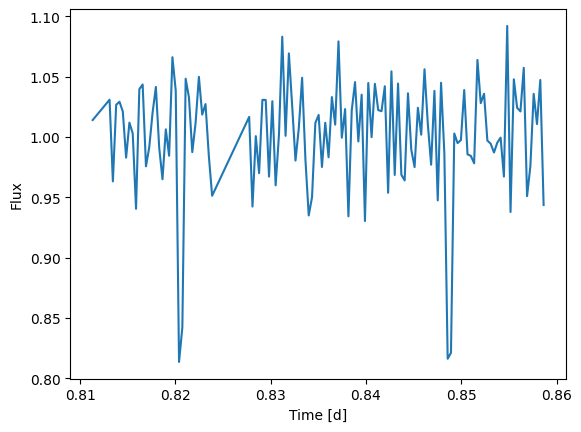

In [144]:
plt.plot(lc_times, fluxes)
plt.xlabel('Time [d]')
plt.ylabel('Flux')
plt.show()

the time between two deepest dips here is approximately the estimated orbital period given in research paper

In [123]:
data_rv = []

with open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/dbf2.txt', 'r') as file:
    lines = file.readlines()[19:] 

    for line in lines:
        parts = line.split()

        if 'J0822' in parts[1]:
            numeric_data = [float(parts[2]), float(parts[3]), float(parts[4]), float(parts[5])]
            data_rv.append(numeric_data)

j0822_rv = np.array(data_rv)

In [124]:
rv_times = j0822_rv[:, 0]
rvs = j0822_rv[:, 1]
rv_sigmas = j0822_rv[:, 2]

In [125]:
j0822_fits = fits.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/j0822p30.fits')

j0822_hdr = j0822_fits[0].header
j0822_data = j0822_fits[0].data

In [126]:
j0822_fits.info()

Filename: /mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/j0822p30.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (2533,)   float32   


In [127]:
j0822_hdr

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 2533 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2017-04-11T22:02:55' / Date FITS file was generated                  
IRAF-TLM= '2017-04-11T22:02:55' / Time of last modification                     
OBJECT  = 'j0822p30'           / Name of the object observed                    
OBSERVAT= 'MMTO              '  /  observatory                                  
OBSERVER= 'WBrown            '  /  observers                                    
EXPTIME =               10680. /  actual integration time                       
DARKTIME=                 96

In [128]:
start_time = Time('2016-02-12 05:16:50', scale='utc') 
time = [start_time.jd]
wavelengths = phoebe.linspace(3600, 4500, 2533)
flux_densities = j0822_data 

In [129]:
b.add_dataset('lc', times = lc_times, fluxes = fluxes, sigmas = lc_sigmas)

b.add_dataset('rv', times = {'primary': rv_times}, rvs = {'primary': rvs}, sigmas = rv_sigmas)

b.add_dataset('lp', 
              times = time,
              wavelengths = wavelengths * 0.1, 
              flux_densities = flux_densities * 0.01)

<ParameterSet: 76 parameters | contexts: figure, compute, constraint, dataset>

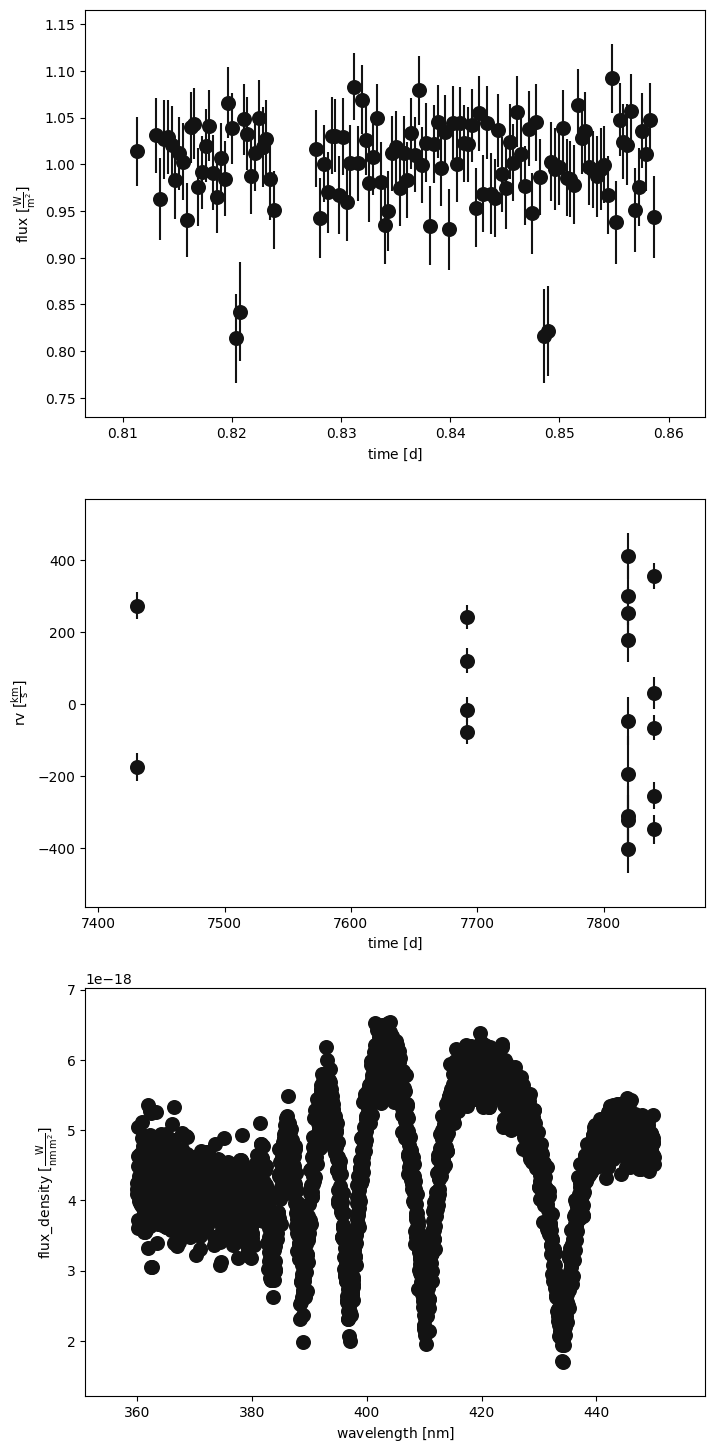

In [130]:
_ = b.plot(show = True, marker = '.')

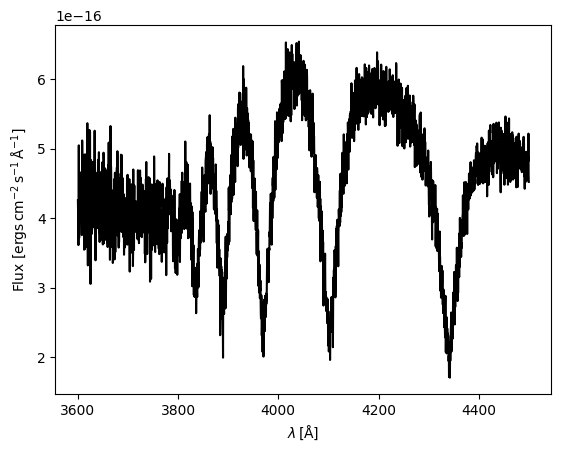

In [131]:
plt.plot(wavelengths, j0822_data, color = 'black')
plt.xlabel(r'$\lambda \, [\text{Å}]$')
plt.ylabel(r'Flux $[\text{ergs} \, \text{cm}^{-2} \, \text{s}^{-1} \, \text{Å}^{-1}]$')
plt.show()